In [5]:
import matrixprofile as mp

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import lasio

In [6]:
# import las files

a_1 = lasio.read('a_suite1.las')
a_2 = lasio.read('a_suite2.las')
a_3 = lasio.read('a_suite3.las')

df = a_1.df()
df_2 = a_2.df()
df_3 = a_3.df()

In [7]:
#file format

type(a_1)
type(df)

pandas.core.frame.DataFrame

### 1. Data exploration, visualization...

In [8]:
# different measurements in a_1 wireline log -------> DT measurement is useful for kick detection

a_1.curvesdict

{'DEPT': CurveItem(mnemonic=DEPT, unit=M, value=00 000 000 000, descr=, original_mnemonic=DEPT, data.shape=(8280,)),
 'BS': CurveItem(mnemonic=BS, unit=IN, value=00 000 000 000, descr=BIT SIZE, original_mnemonic=BS, data.shape=(8280,)),
 'CALI': CurveItem(mnemonic=CALI, unit=IN, value=00 000 000 000, descr=CALIPER, original_mnemonic=CALI, data.shape=(8280,)),
 'DT': CurveItem(mnemonic=DT, unit=US/F, value=00 000 000 000, descr=DELTA TIME COMPRESSIVE, original_mnemonic=DT, data.shape=(8280,)),
 'GR': CurveItem(mnemonic=GR, unit=GAPI, value=00 000 000 000, descr=NATURAL GAMMA RAY, original_mnemonic=GR, data.shape=(8280,)),
 'ITT': CurveItem(mnemonic=ITT, unit=, value=00 000 000 000, descr=INTEGRATED TRAVEL TIME MARK, original_mnemonic=ITT, data.shape=(8280,)),
 'TENS': CurveItem(mnemonic=TENS, unit=LBS, value=00 000 000 000, descr=CABLE TENSION, original_mnemonic=TENS, data.shape=(8280,))}

In [9]:
# different measurements in a_2 wireline log ----------> RHOB measurement is useful for kick detection

a_2.curvesdict

{'DEPT': CurveItem(mnemonic=DEPT, unit=M, value=00 000 000 000, descr=, original_mnemonic=DEPT, data.shape=(6638,)),
 'BS': CurveItem(mnemonic=BS, unit=IN, value=00 000 000 000, descr=BIT SIZE, original_mnemonic=BS, data.shape=(6638,)),
 'CALI': CurveItem(mnemonic=CALI, unit=IN, value=00 000 000 000, descr=CALIPER - G SERIES CDT, original_mnemonic=CALI, data.shape=(6638,)),
 'DRHO': CurveItem(mnemonic=DRHO, unit=G/C3, value=00 000 000 000, descr=DENSITY CORRECTION, original_mnemonic=DRHO, data.shape=(6638,)),
 'GR': CurveItem(mnemonic=GR, unit=GAPI, value=00 000 000 000, descr=NATURAL GAMMA RAY, original_mnemonic=GR, data.shape=(6638,)),
 'NPHI': CurveItem(mnemonic=NPHI, unit=DECP, value=00 000 000 000, descr=NEUTRON POROSITY, original_mnemonic=NPHI, data.shape=(6638,)),
 'RHOB': CurveItem(mnemonic=RHOB, unit=G/C3, value=00 000 000 000, descr=BULK DENSITY, original_mnemonic=RHOB, data.shape=(6638,)),
 'TENS': CurveItem(mnemonic=TENS, unit=LBS, value=00 000 000 000, descr=CABLE TENSION,

In [10]:
# different measurements in a_3 wireline log ----------> MSFLA measurement is useful for kick detection


a_3.curvesdict

{'DEPT': CurveItem(mnemonic=DEPT, unit=M, value=00 000 000 000, descr=, original_mnemonic=DEPT, data.shape=(6454,)),
 'BS': CurveItem(mnemonic=BS, unit=IN, value=00 000 000 000, descr=BIT SIZE, original_mnemonic=BS, data.shape=(6454,)),
 'CALI': CurveItem(mnemonic=CALI, unit=IN, value=00 000 000 000, descr=CALIPER, original_mnemonic=CALI, data.shape=(6454,)),
 'GR': CurveItem(mnemonic=GR, unit=GAPI, value=00 000 000 000, descr=NATURAL GAMMA RAY, original_mnemonic=GR, data.shape=(6454,)),
 'LLD': CurveItem(mnemonic=LLD, unit=OHMM, value=00 000 000 000, descr=LATEROLOG DEEP RESISTIVITY, original_mnemonic=LLD, data.shape=(6454,)),
 'LLS': CurveItem(mnemonic=LLS, unit=OHMM, value=00 000 000 000, descr=LATEROLOG SHALLOW RESISTIVITY, original_mnemonic=LLS, data.shape=(6454,)),
 'MSFLA': CurveItem(mnemonic=MSFLA, unit=OHMM, value=00 000 000 000, descr=MSFL RESISTIVITY, original_mnemonic=MSFLA, data.shape=(6454,)),
 'SP': CurveItem(mnemonic=SP, unit=, value=00 000 000 000, descr=SPONTANEOUS PO

In [11]:
# convert series to numpy. numpy data format required for analysis

DT = df['DT'].values
GR = df['GR'].values
RHOB = 1000*(df_2['RHOB'].values)
MSFLA = df_3['MSFLA'].values
LLS = df_3['LLS'].values

In [12]:
type(DT)

numpy.ndarray

In [13]:
# MU_SEC/FT ---> MU_SEC/M

DT = DT/0.3048

vel = 1/DT

In [14]:
DT

array([235.70800525, 236.22047244, 235.96423885, ..., 301.83727034,
       301.83727034, 301.83727034])

In [15]:
# make a separate variable that stores depth values. useful for plotting results

depth = df.index.values

In [16]:
len(depth)

8280

Text(0, 0.5, 'Slowness, micro-sec/m')

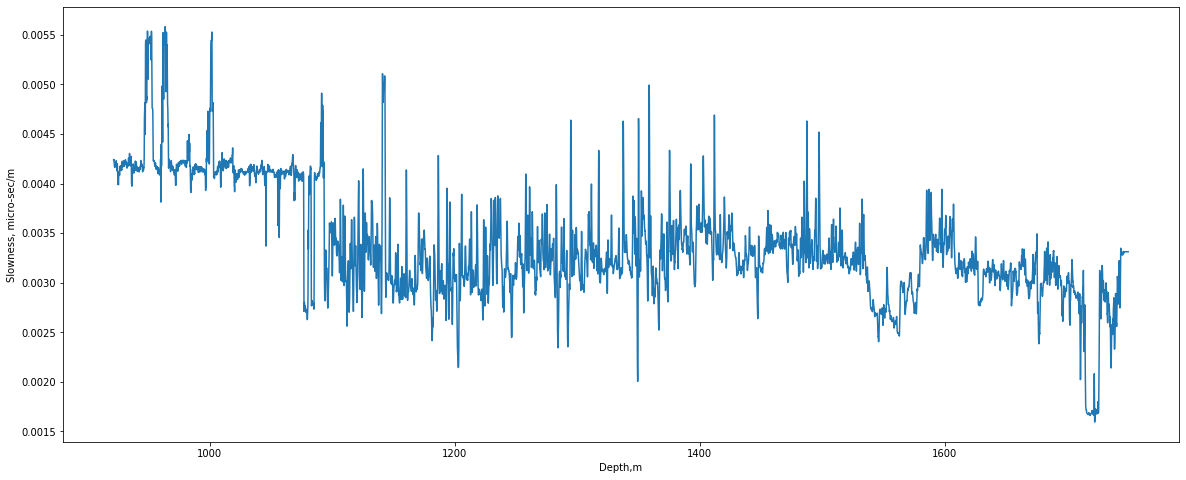

In [17]:
plt.figure(figsize=(20,8))

plt.plot(depth,vel)
plt.xlabel('Depth,m')
plt.ylabel('Slowness, micro-sec/m')

Text(0, 0.5, 'Slowness, micro-sec/m')

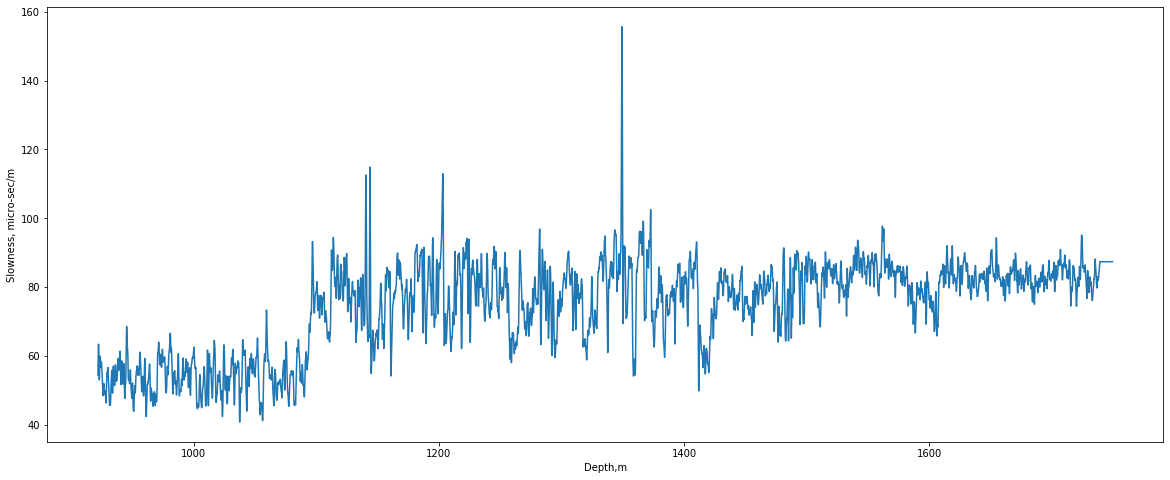

In [18]:
plt.figure(figsize=(20,8))

plt.plot(depth,GR)
plt.xlabel('Depth,m')
plt.ylabel('Slowness, micro-sec/m')

##### Note: a_1,a_2 and a_3 wireline logs have different depth intervals. Make different depth variables for each wireline logging file

Text(0, 0.5, 'Bulk density, kg/m3')

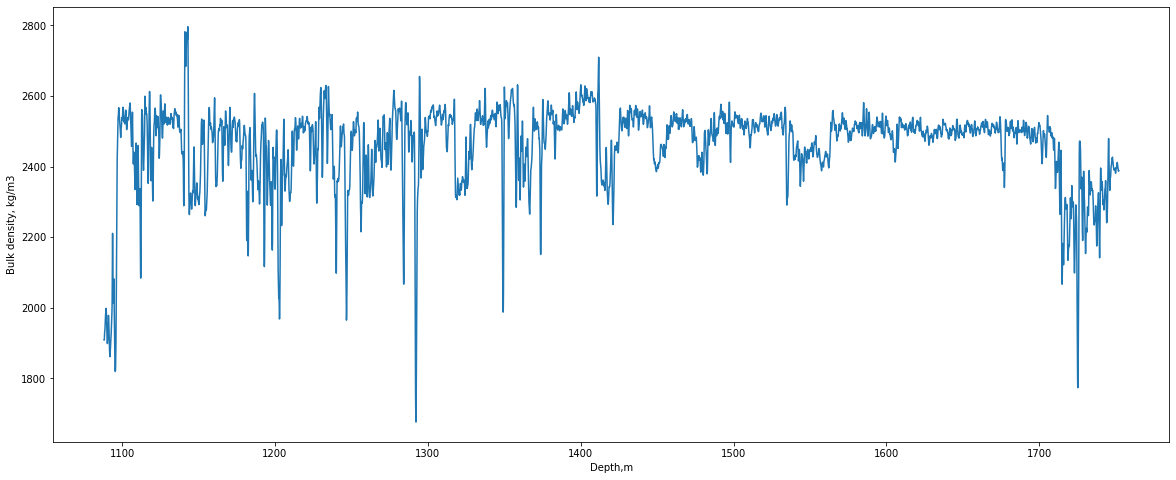

In [19]:

# depth variable for 2nd log file
depth_2 = df_2.index.values

plt.figure(figsize=(20,8))

plt.plot(depth_2,RHOB)
plt.xlabel('Depth,m')
plt.ylabel('Bulk density, kg/m3')

Text(0, 0.5, 'MSFLA Resistivity, Ohm.m')

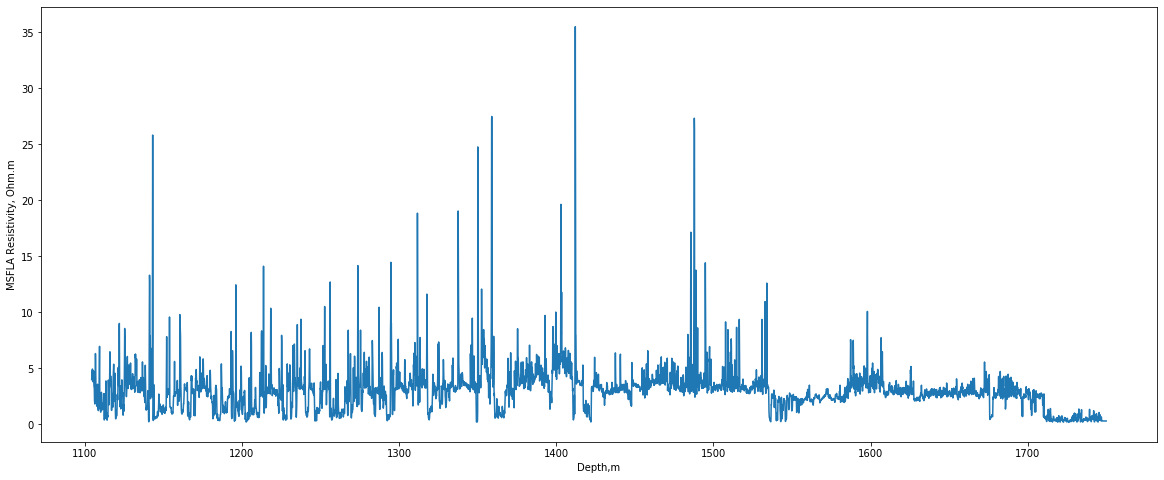

In [20]:

# depth variable for the 3rd file
depth_3 = df_3.index.values

plt.figure(figsize=(20,8))

plt.plot(depth_3,MSFLA)
plt.xlabel('Depth,m')
plt.ylabel('MSFLA Resistivity, Ohm.m')

Text(0, 0.5, 'Laterolog Resistivity Short, Ohm.m')

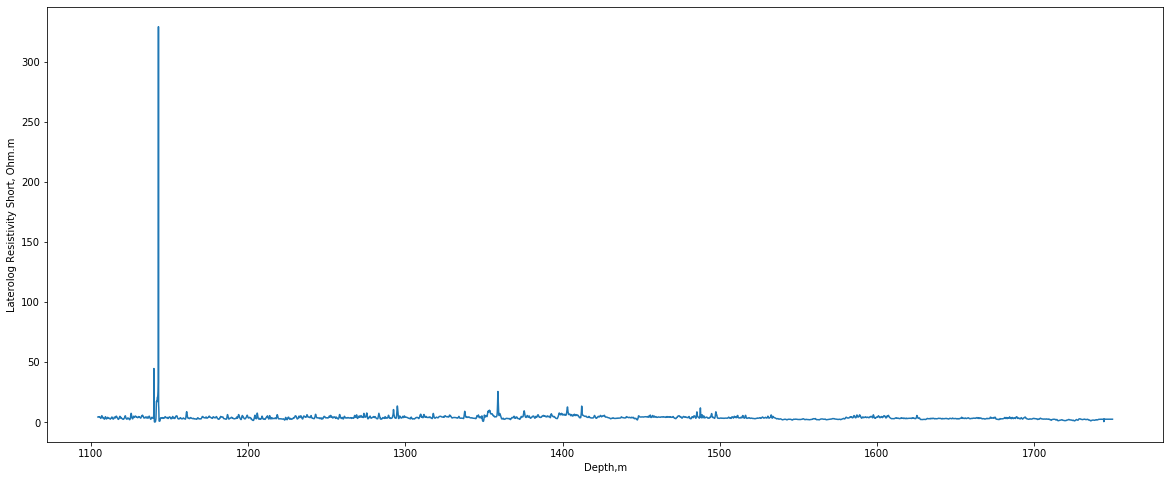

In [21]:
plt.figure(figsize=(20,8))

plt.plot(depth_3,LLS)
plt.xlabel('Depth,m')
plt.ylabel('Laterolog Resistivity Short, Ohm.m')

### 2. Signal decomposition

The wireline sensors are designed to make measurements of the formation (rock and fluids in the pore). To do this sensors must have a depth of investigation that is more than the wellbore radius. It is to be expected that wireline sensors  also measure properties of - mud that is circulating in the wellbore annulus at the time of drilling and the casing tubes(if any)-because they are within the depth of investigation of the tool. 

Example-of-a-logging-tool-left-Courtesy-of-Schlumberger-The-wireline-logging.png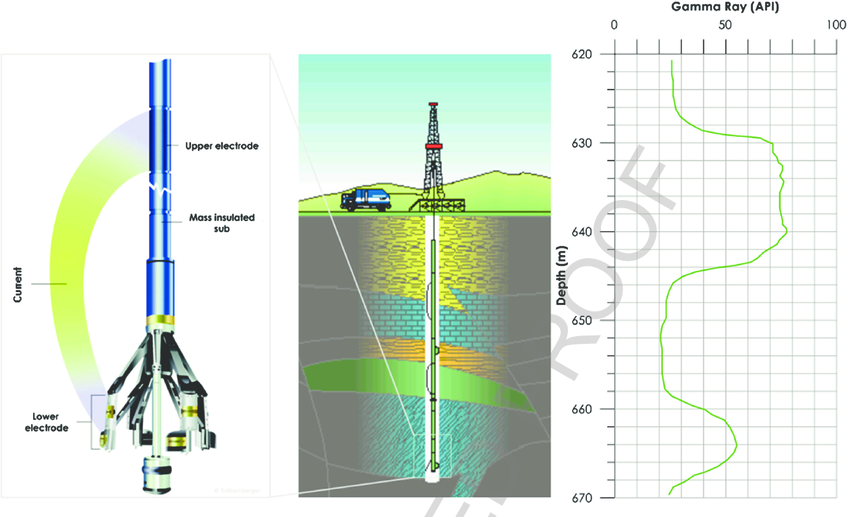

To get to the signals of interest (ie. fluids in the annulus), some signal decomposition is necessary. Currently the focus is on decomposing the sonic sensor signals. There are many algorithm that can help with signal decomposition. In this notebook, Empirical Mode Decomposition (EMD) and Ensemble EMD (EEMD) are chosen.

Other decomposition techniques will be reviewed and programmed.

In [22]:
# import library

from PyEMD import EMD,EEMD

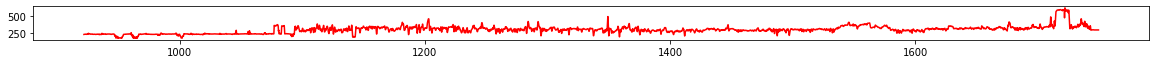

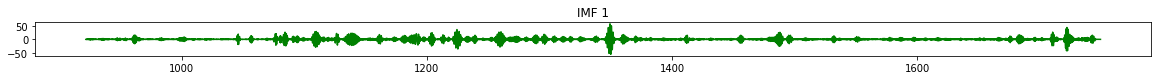

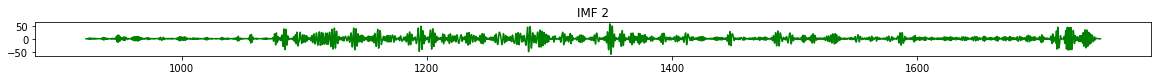

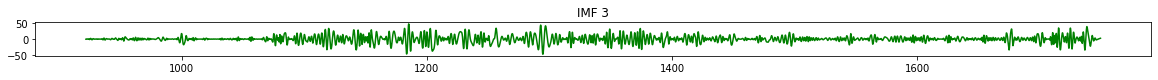

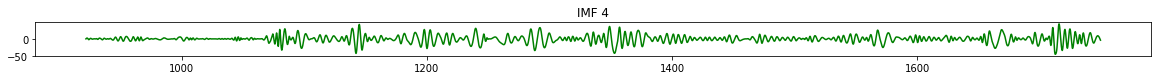

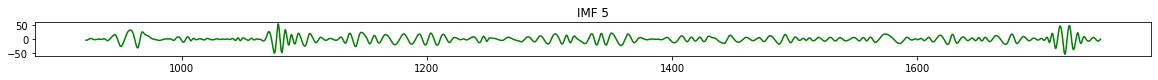

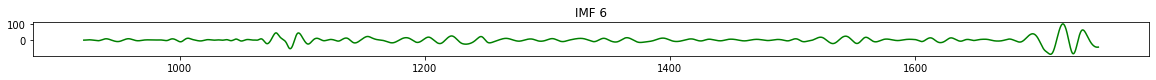

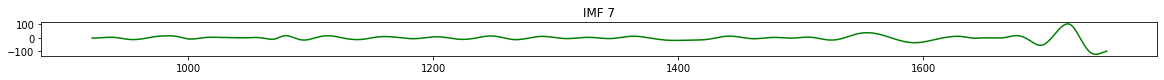

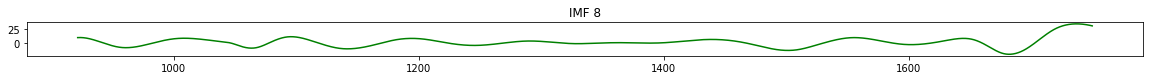

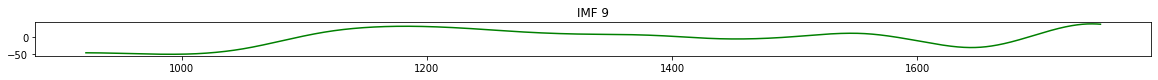

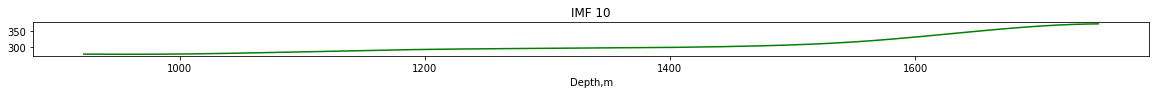

In [23]:
from PyEMD import EMD
import numpy  as np
import pylab as plt

# Execute EMD on DT
IMF = EMD().emd(DT,depth)
N = IMF.shape[0]+1

# Plot results
plt.figure(figsize=(20,8))
plt.subplot(N,1,1)
plt.plot(depth, DT, 'r')

for n, imf in enumerate(IMF):
    plt.figure(figsize=(20,8))

    
    plt.subplot(N,1,n+2)
    plt.plot(depth, imf, 'g')
    plt.title("IMF "+str(n+1))
plt.xlabel("Depth,m")
plt.show()

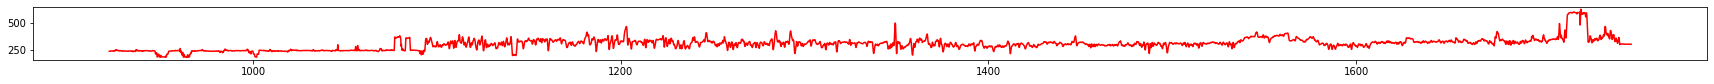

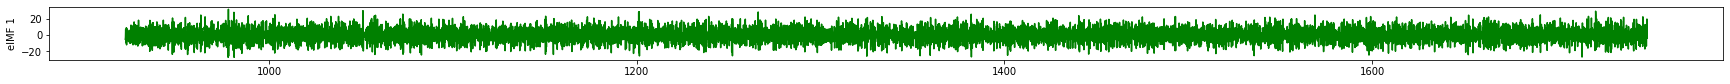

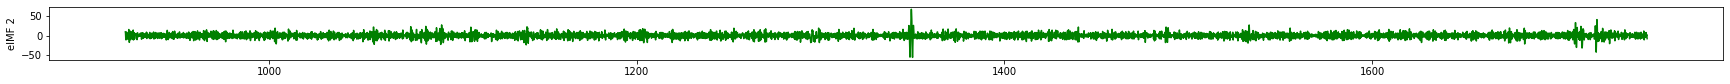

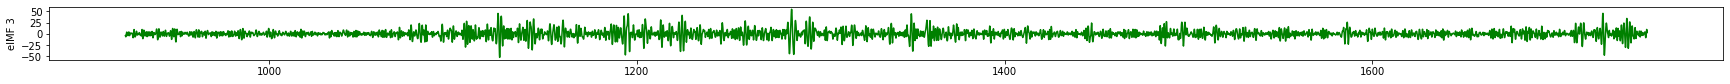

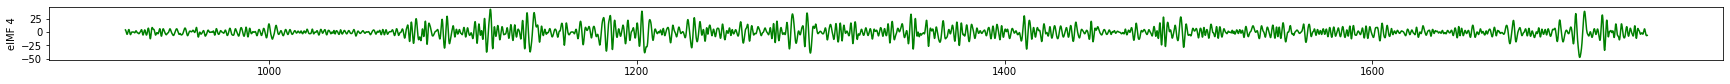

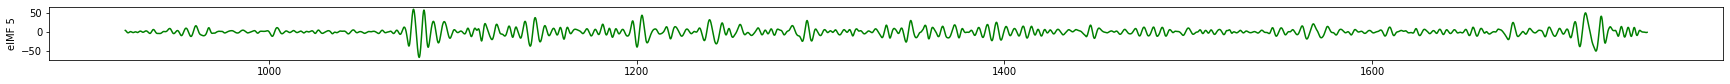

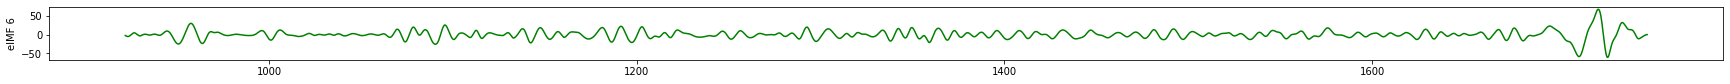

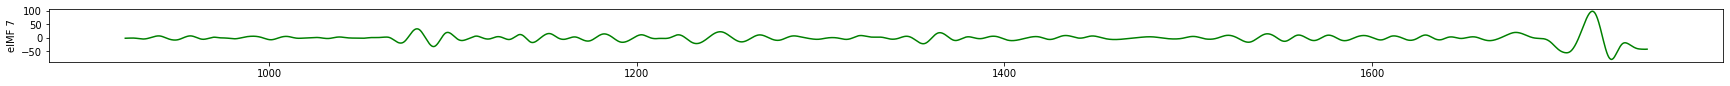

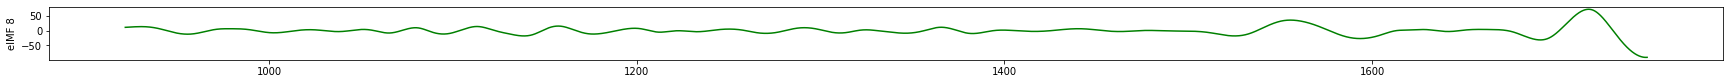

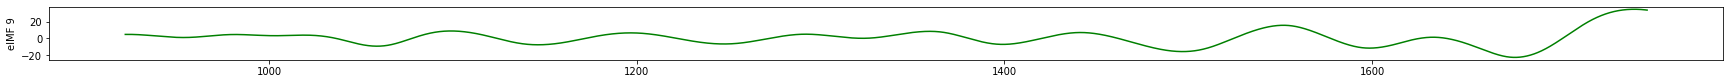

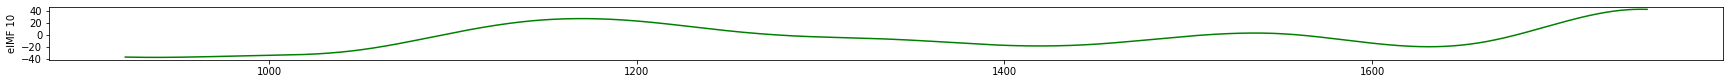

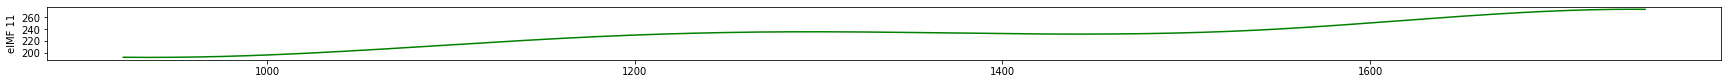

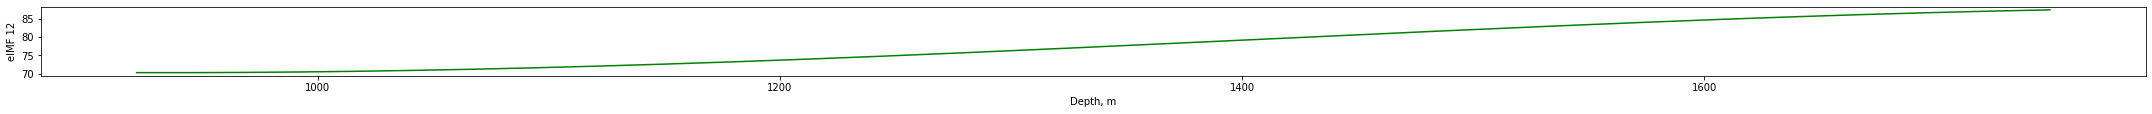

In [24]:
# Assign EEMD to `eemd` variable
eemd = EEMD()
# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"
# Execute EEMD on S
eIMFs = eemd.eemd(DT, depth)
nIMFs = eIMFs.shape[0]
# Plot results
plt.figure(figsize=(30,15))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(depth, DT, 'r')
for n in range(nIMFs):
    plt.figure(figsize=(30,15))
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(depth, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)
plt.xlabel("Depth, m")
plt.tight_layout()
plt.show()

##### Note: (1) EMD decomposes an original nonlinear and non-stationary signal into a series of simple intrinsic mode functions (IMFs), but with the mode mixing phenomenon. (2) EEMD skillfully solves the mode mixing problem by adding a white noise to the original signal. EMD and EEMD decompose the signal in ascending order of frequency. Between the formation and fluid, what changes more rapidly? What causes the high freq features? What causes low freq features? 

### 3. Signal segmentation using matrix profile

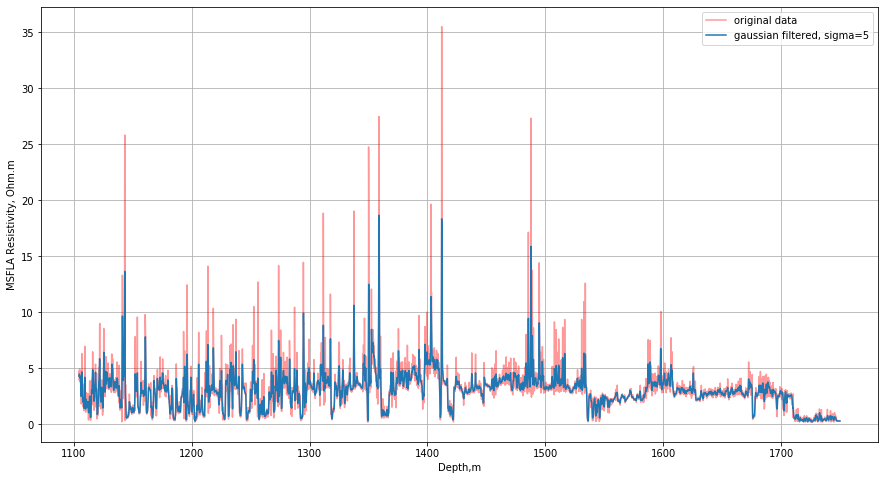

In [25]:
# Analysis on MSFLA Shallow Resistivity log
# include SP in the analysis

from scipy.ndimage import gaussian_filter1d,median_filter,convolve1d,sobel,prewitt

MSFLA_5 = gaussian_filter1d(MSFLA,2)

plt.figure(figsize=(15,8))
plt.plot(depth_3,MSFLA,'r',alpha=0.4, label='original data')
plt.plot(depth_3,MSFLA_5, label='gaussian filtered, sigma=5')
plt.legend()
plt.grid()
plt.xlabel('Depth,m')
plt.ylabel('MSFLA Resistivity, Ohm.m')
plt.show()

/Users/anujsuhag/opt/anaconda3/lib/python3.7/site-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


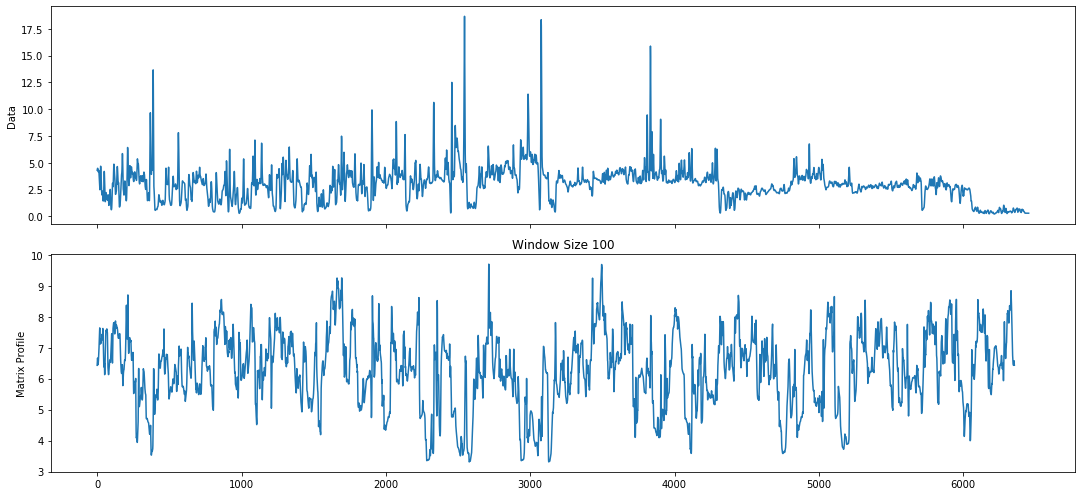

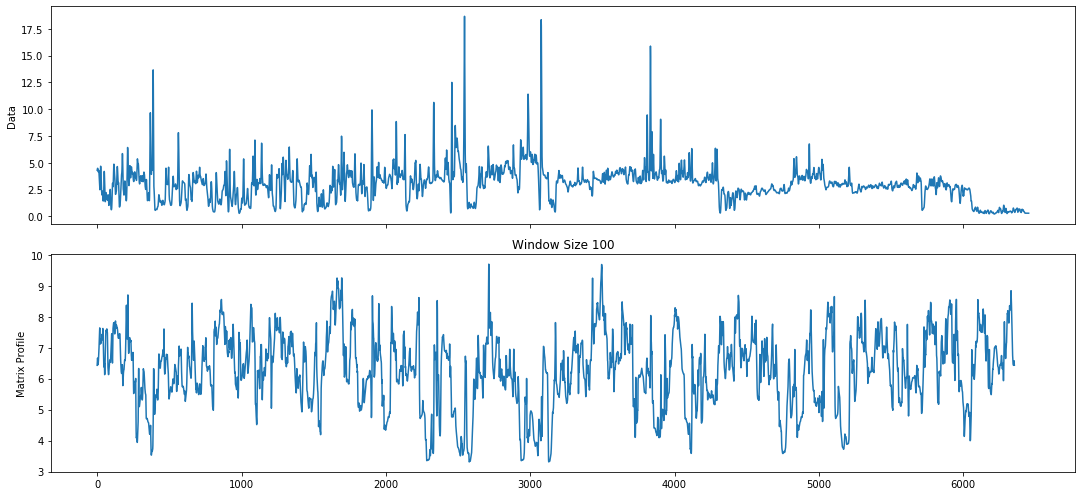

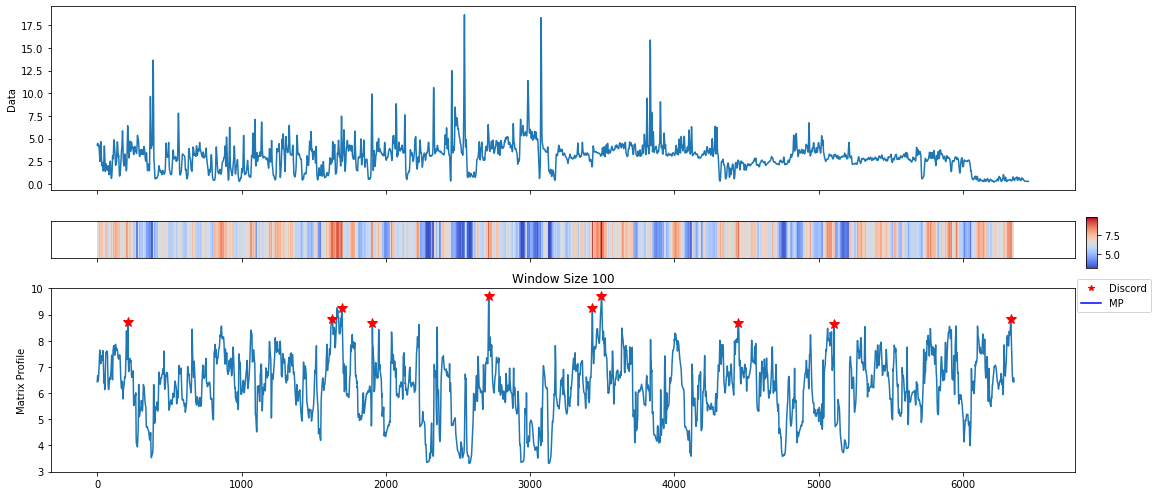

In [80]:
MSFLA_deriv = gaussian_filter1d(MSFLA,5,order=1)
profile = mp.compute(MSFLA_5,windows=100)
figures = mp.visualize(profile)

profile = mp.discover.discords(profile, k = 10, exclusion_zone = 50)
mp.visualize(profile)
plt.show()

In [81]:
profile['discords']

array([2713, 3495, 1695, 3432, 6331, 1630,  213, 4442, 1907, 5107])

In [82]:
df_3.head()

,BS,CALI,GR,LLD,LLS,MSFLA,SP,TENS,depth
DEPT,,,,,,,,,
1104.5,8.5,9.7861,73.6037,6.0288,4.3963,3.9931,-12.8619,1584.6733,1104.5
1104.6,8.5,9.7886,72.9497,6.2020,4.5181,4.3580,-12.9238,1588.0118,1104.6
1104.7,8.5,9.8196,72.4647,6.3162,4.6205,4.7334,-12.8857,1592.8057,1104.7
1104.8,8.5,9.8376,71.7239,6.2453,4.5876,4.2969,-13.0714,1598.3557,1104.8
1104.9,8.5,9.8376,70.9187,6.1475,4.5008,4.8332,-13.3762,1601.9655,1104.9


In [83]:
df_3['depth'] = df_3.index

In [84]:
df_3['depth'] = df_3.index
anomalous_depths = []

for i in profile['discords']:

    anomalous_depths.append(df_3['depth'].iloc[i])

In [85]:
# known anomalous points -----> 1267, 1326, 1433, 1728
sorted(anomalous_depths)

[1125.8,
 1267.5,
 1274.0,
 1295.2,
 1375.8,
 1447.7,
 1454.0,
 1548.7,
 1615.2,
 1737.6]

##### Note: 
##### The borehole tool was at these depths when they observed a kick on the surface, as was reported by data provider : 1267, 1326, 1433, 1728 .  
##### Kicks as detected by matrix profile : 1375.8,1454.0,1274.0,1447.7,1737.6,1267.5,1125.8,1548.7,1295.2,1615.2


16.03.19

Anju,

Thank you for your e-mail.

First of all, congratulations on securing a USDOE position/grant.  Hopefully, it will lead to a permanent position.  I always worry about the International Students, because of the "Green Card" hurdle, for US employment.

Now, for your qproject, which is very interesting:

You had a GOT well for your PTE-461 Flank Oil Co. (FOCO) problem, so You may have had a LWD Sonic.  If so, it would have been an early version and they were extremely noisy, because the early "Bit Noise" filters were not that good.  We tried to use a LWD sonic, for porosities, on the first extended reach directional well, for that project, because the Drilling Superintendent did not want to risk "planting radio-active sources.  Fortunately, he was a former Schlumberger W/L field engineer, and agreed with me that the available LWD Sonic tools were not reliable porosity tools. The Neutron and density tools then available both had retrievable sources, so the tool pushers were instructed to pull the sources, before attempting to extract "stuck drill strings.

Compensated (BHC/BCS) sonic logs are self compensating, so you will not see the effects mud column on the. Full Waveform data may show amplitude effects, due to mud composition changes.  However Interval Transit Time (ITT), which is inverse acoustic velocity may to change greatly, due to mud chemistry variations, unless you have gas bubbles in the mud.

Resistivity, neutron, bulk density, and Photo-Electric Effect (PEF), are sensitive to mud chemistry changes.  For wireline (W/L), the Mud characteristics are those of the mud samples taken from the mud pit or mud return, prior to logging.  You, however, are concerned with the mud properties during the drilling operations.  Some LWD sub-assemblies do have "mud sample chambers, which will provide information, usually mud resistivity, as a function of depth.  I am not certain if these sub-assemblies also provide mud density or neutron absorption information.  A fall-back would  be if the mud logger made mud properties measurements before washing the cutting samples for examination.  

Most modern density and neutron sub-assemblies are quadrature measurements.  For those, monitor the "Up Quadrant" measure (which will not always be the same, due to Drill String rotation), as that quadrant should have the greatest mud contribution.  It will also help if there was an Acoustic Caliper sub-assembly, on the tool string. 

For Array induction logs, the 10 amplitude and phase measurements will have the shortest coil spacing, and should have the greatest mud effects.  Remember, however, that Array induction resistivities are not actual measurements, but rather cylindrical shell model resisivities fitted to the actual measurements.

With these comments, I wish you well on your project.  Let me know how it turns out.



Anuj,

That would be fine.  

I suspect that the impetus, for your study is the possibility of forecasting potential blow-outs, before the traditional mud returns and mud pit level signs.  This is an intriguing possibility, but also a high-risk one.

The best way to contact me, in the future is via:

<dgh@hillpetro.com>

as I do not regularly check my USC e-mail boxes, when I am not teaching PTE-461.




25.03.19

The concern (monitoring formation fluid influx) is a real one.  However, I am not entirely certain how much formation water or HC influx will change the borehole fluid physical properties.  I would expect the greatest change in the shallowest resistivities.  The best measure would be if the LWD subassembly had a mud resistivity cell.  I think that some of the most  recent LWD systems do include this capability, but I am not certain how long it has been available.

Don Hill






26.03.19

Anuj,

All research is "High Risk".  That is why it is called Research.  When Chevron still had an E&P Research Unit, COFRC, the corporate CEO was once asked how he quantified research.  His reply was that a budget was created for research with the hope that 1 in 10 +/- projects would develop something useful.  

This is about the same success ratio of Rank Wildcat wells.  You can try to increase your drilling success ratio with sophisticated geology and geophysical data acquisition and data processing.  In fact, major oil companies will often spend as much, or more than the cost of a Wildcat Well, evaluating a prospect, because one well is only a "Point Evaluation", but the geological and geophysical data used to justify it, greatly increases the value of the Wildcat.  In fact, had BP listed to their geology department, they might have been able to avoid the Macondo-01 blow-out, which nearly destroyed the company.

However, there is no short-cut for good research.

An a example of successful research is the "Common Depth Point Stacking Technique.  I think that it was first patented by Petty Geophysical Engineering.  Shell Development Co (former Shell R&D subsidiary) apparently had also developed the technique.  However, because Shell management considered it to be such a significant development in Seismic data acquisition and processing, they signed a 5 year exclusive license with Petty.  I am certain, however, that Petty Geophysical and Shell Development Co. had numerous other research projects and patents that went nowhere.

You have my best wishes for your success.

Don Hill






##### TO-DO from the last meeting

1. Overlays of the same signals
2. Run matrix profile on other signals
3. Talk to Brian about experiments and algorithm work, intersection

#### limitations, disadv of experiment data. from the pov of algo devops


<>experiments --- limitations Brian ack ---- put them down in a report


<>DFM, correlations etc etc 


<>DFM ----> vol frac ----> 


-----> predict KPI as f(VF). simulate this with added noise factor. 

-----> OTC paper and presentation

-----> instrument sensitivity? (for vel



In [49]:
DT = df['DT'].values
GR = df['GR'].values
RHOB = 1000*(df_2['RHOB'].values)
MSFLA = df_3['MSFLA'].values
LLS = df_3['LLS'].values


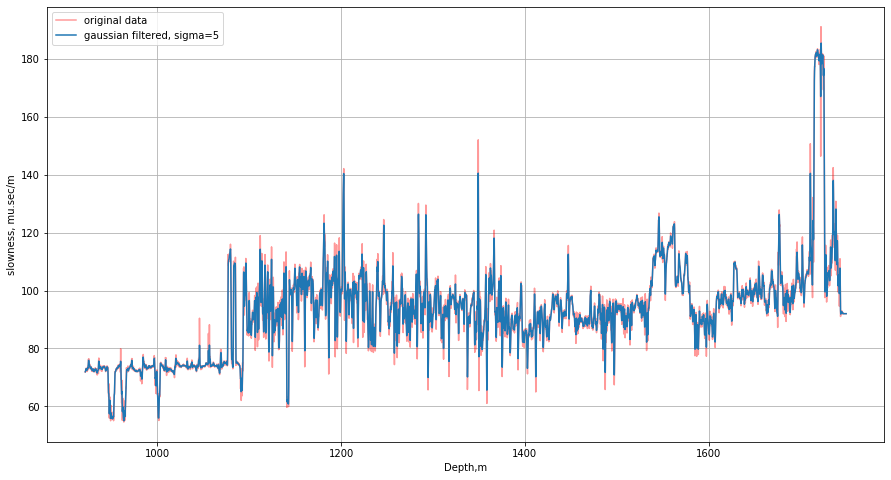

In [50]:
DT_5 = gaussian_filter1d(DT,2)

plt.figure(figsize=(15,8))
plt.plot(depth,DT,'r',alpha=0.4, label='original data')
plt.plot(depth,DT_5, label='gaussian filtered, sigma=5')
plt.legend()
plt.grid()
plt.xlabel('Depth,m')
plt.ylabel('slowness, mu.sec/m')
plt.show()

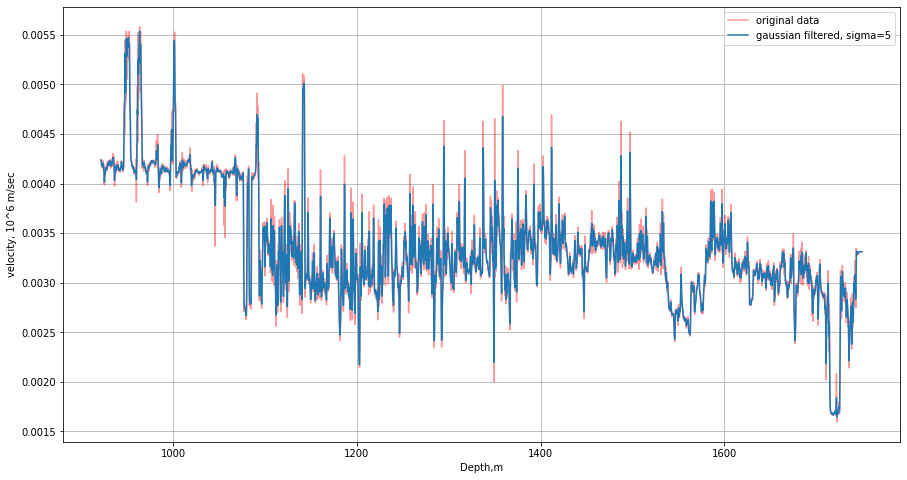

In [51]:
vel_5 = gaussian_filter1d(vel,2)


plt.figure(figsize=(15,8))
plt.plot(depth,vel,'r',alpha=0.4, label='original data')
plt.plot(depth,vel_5, label='gaussian filtered, sigma=5')
plt.legend()
plt.grid()
plt.xlabel('Depth,m')
plt.ylabel('velocity, 10^6 m/sec')
plt.show()

/Users/anujsuhag/opt/anaconda3/lib/python3.7/site-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


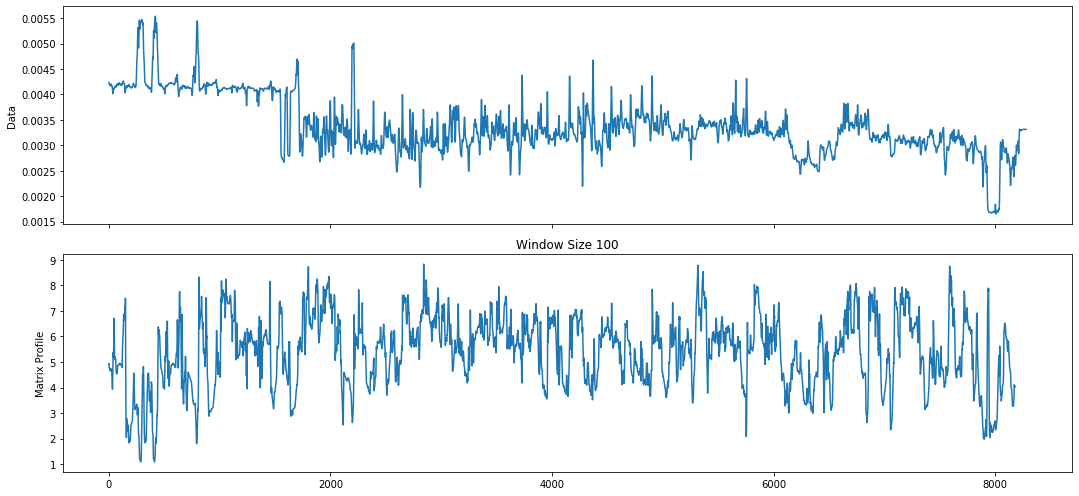

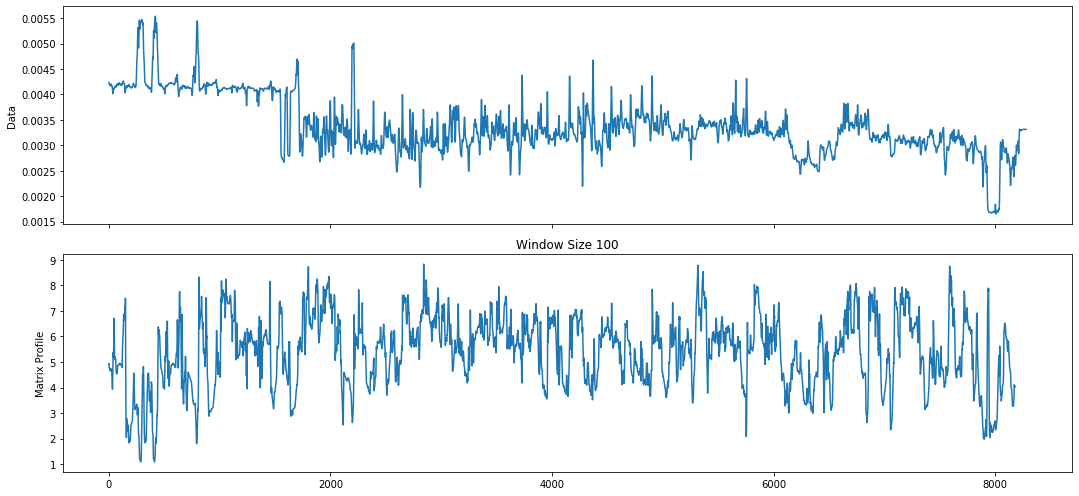

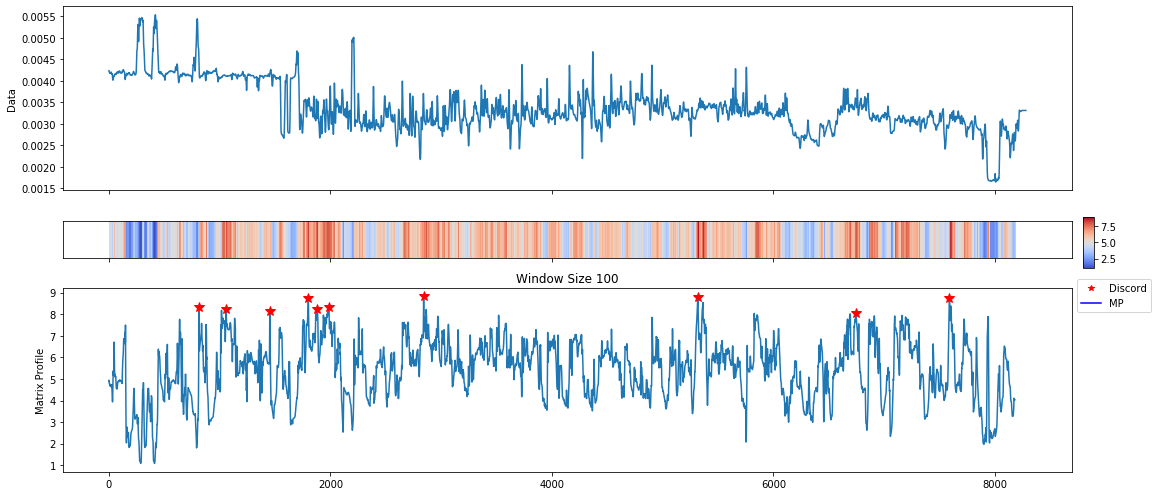

In [86]:
vel_deriv = gaussian_filter1d(vel,5,order=1)
profile = mp.compute(vel_5,windows=100)
figures = mp.visualize(profile)

profile = mp.discover.discords(profile, k = 10, exclusion_zone = 50)
mp.visualize(profile)
plt.show()

In [87]:
profile['discords']

array([2842, 5317, 7589, 1801, 1987,  813, 1881, 1059, 1453, 6745])

In [88]:
df['depth'] = df.index
anomalous_depths = []

for i in profile['discords']:

    anomalous_depths.append(df['depth'].iloc[i])

In [89]:
# known anomalous points -----> 1267, 1326, 1433, 1728
sorted(anomalous_depths)

[1003.0,
 1027.6,
 1067.0,
 1101.8,
 1109.8,
 1120.4,
 1205.9,
 1453.4,
 1596.2,
 1680.6]

#### Note: Add discords to the real data also!!

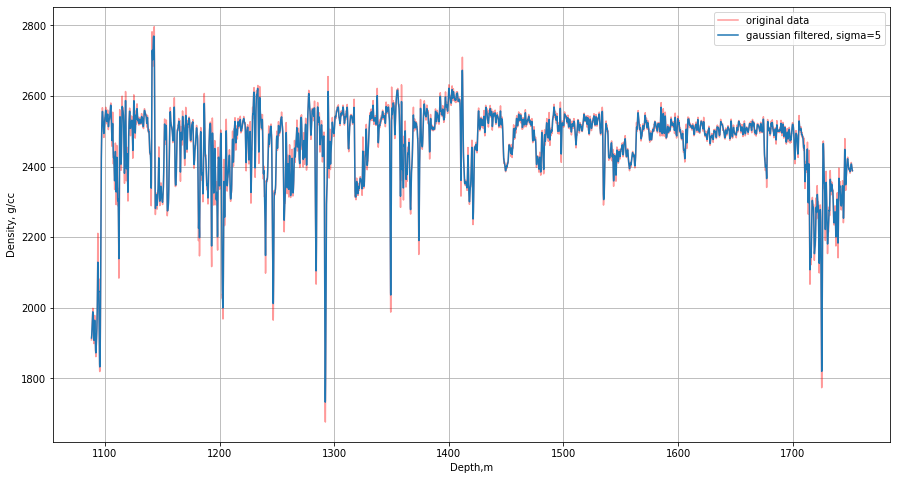

In [90]:
RHOB_5 = gaussian_filter1d(RHOB,2)

plt.figure(figsize=(15,8))
plt.plot(depth_2,RHOB,'r',alpha=0.4, label='original data')
plt.plot(depth_2,RHOB_5, label='gaussian filtered, sigma=5')
plt.legend()
plt.grid()
plt.xlabel('Depth,m')
plt.ylabel('Density, g/cc')
plt.show()

/Users/anujsuhag/opt/anaconda3/lib/python3.7/site-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


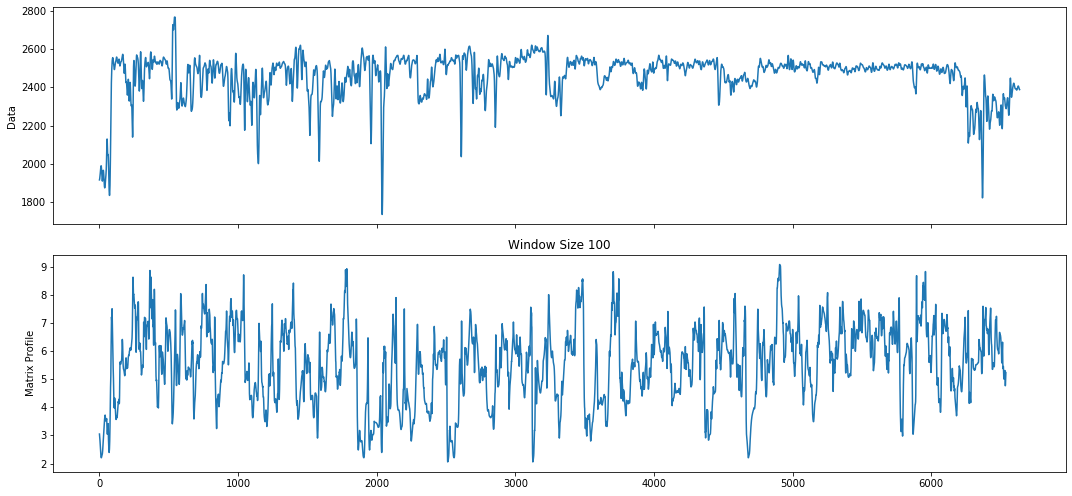

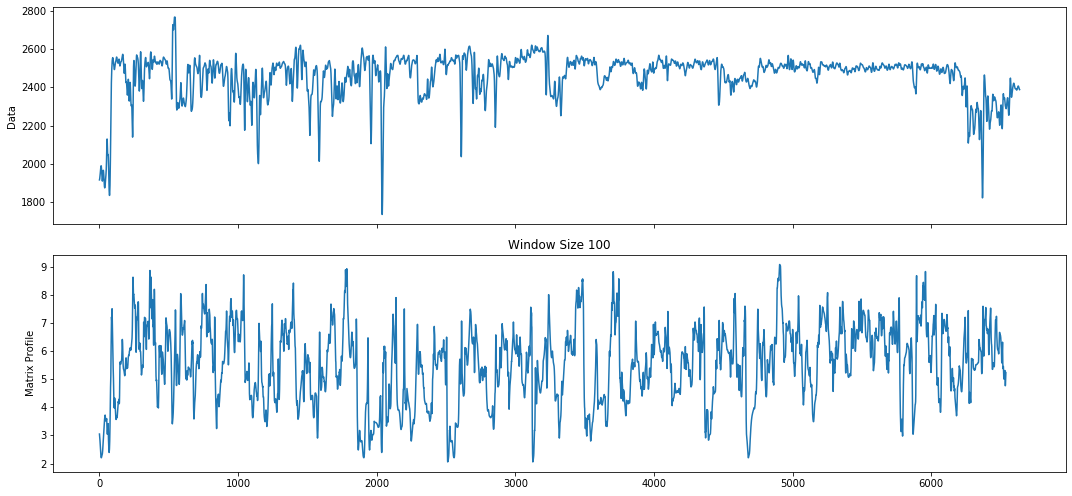

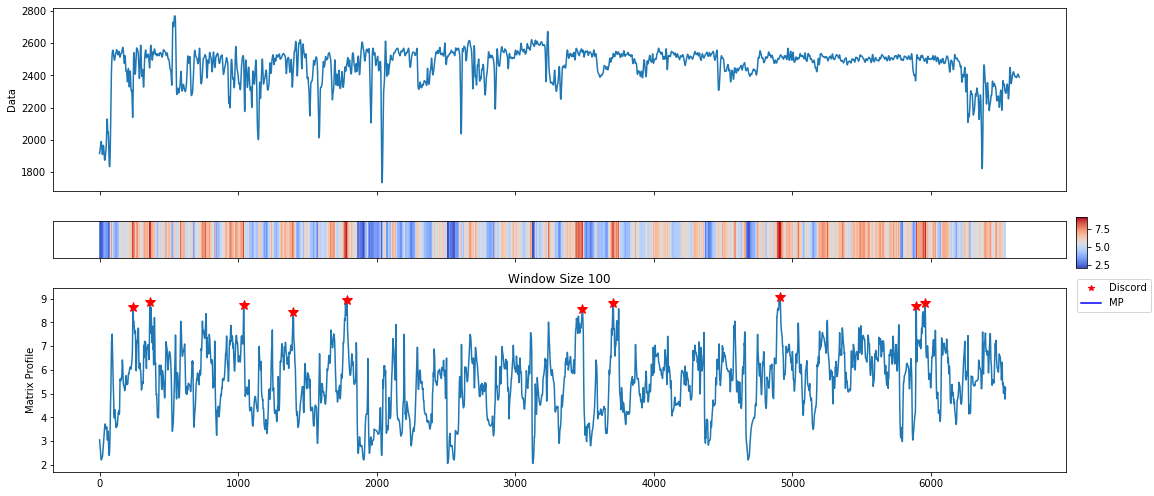

In [91]:
RHOB_deriv = gaussian_filter1d(RHOB,5,order=1)
profile = mp.compute(RHOB_5,windows=100)
figures = mp.visualize(profile)

profile = mp.discover.discords(profile, k = 10, exclusion_zone = 50)
mp.visualize(profile)
plt.show()

In [92]:
df_2['depth'] = df_2.index
anomalous_depths = []

for i in profile['discords']:

    anomalous_depths.append(df_2['depth'].iloc[i])

In [93]:
# known anomalous points -----> 1267, 1326, 1433, 1728
sorted(anomalous_depths)

[1112.5,
 1124.7,
 1192.3001,
 1228.2001,
 1266.7001,
 1436.8001,
 1458.9001,
 1579.0001,
 1677.7001,
 1684.1001]

### Overlay GR from different suites and compare

In [62]:
GR = df['GR'].values  #depth
GR_2 = df_2['GR'].values  # depth_2
GR_3 = df_3['GR'].values   # depth_3

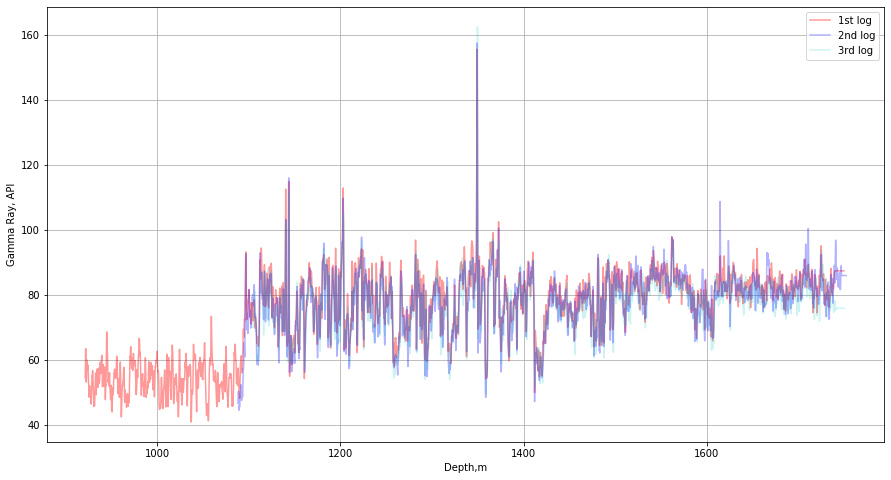

In [67]:
plt.figure(figsize=(15,8))
plt.plot(depth,GR,'r',alpha=0.4, label='1st log')
plt.plot(depth_2,GR_2,'b',alpha=0.3, label='2nd log')
plt.plot(depth_3,GR_3,'c',alpha=0.2, label='3rd log')
plt.legend()
plt.grid()
plt.xlabel('Depth,m')
plt.ylabel('Gamma Ray, API')
plt.show()

##### Notes: 
1. GR logs from various suites seem to overlap. The data is from the same well. 
2. Lithology change around 1100 m.... first look for segmentation in the lithology and then within that group find segments that can correspond to a kick

/Users/anujsuhag/opt/anaconda3/lib/python3.7/site-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


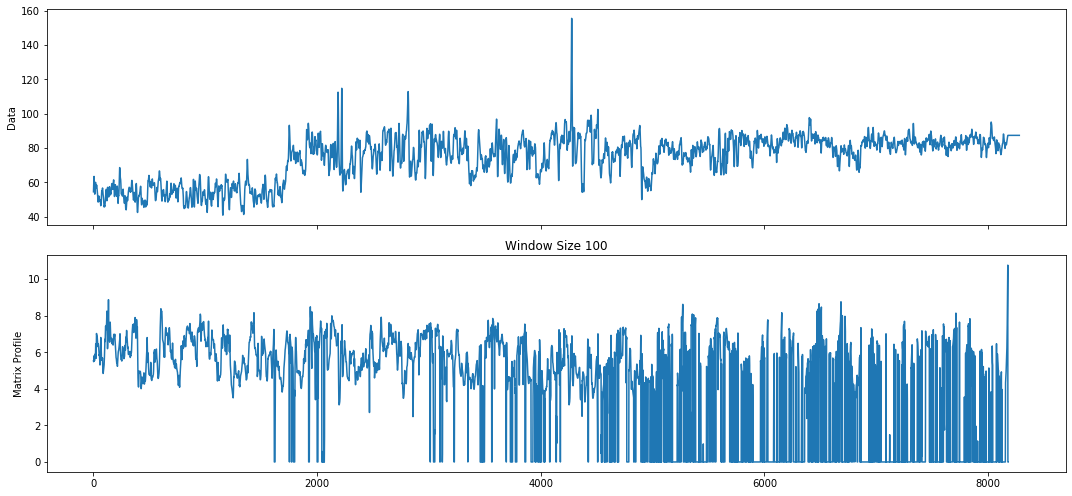

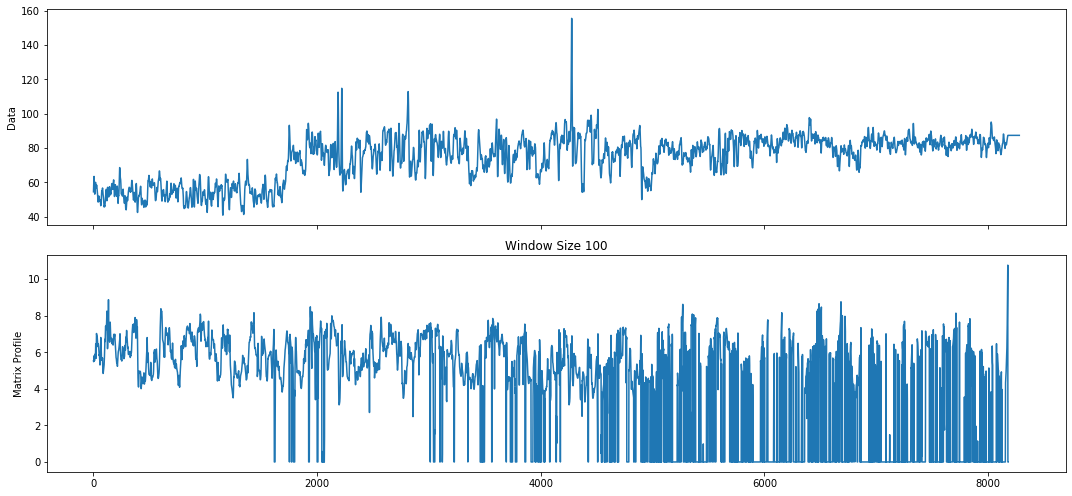

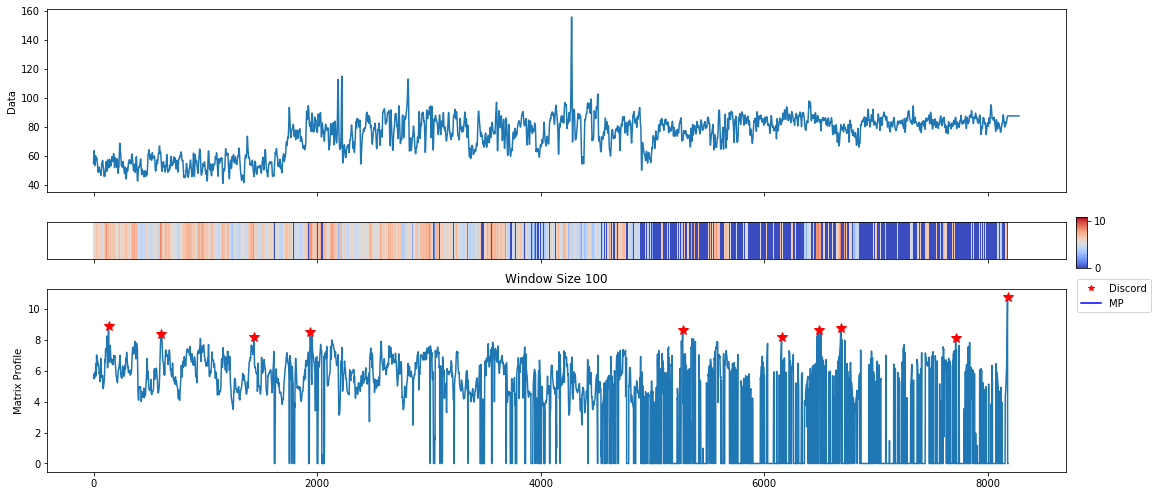

In [76]:
#RHOB_deriv = gaussian_filter1d(RHOB,5,order=1)
profile = mp.compute(GR,windows=100)
figures = mp.visualize(profile)

profile = mp.discover.discords(profile, k = 10)
mp.visualize(profile)
plt.show()

In [77]:
profile['discords']

array([8176,  134, 6684, 6488, 5270, 1939,  603, 1435, 6155, 7712])

In [78]:

anomalous_depths = []

for i in profile['discords']:

    anomalous_depths.append(df['depth'].iloc[i])

In [79]:
anomalous_depths

[1739.3, 935.1, 1590.1, 1570.5, 1448.7, 1115.6, 982.0, 1065.2, 1537.2, 1692.9]

## PPT points

1. Different signals as subplots (3,1). 
2. Highlight the given kicks on each parameter of 1
3. Highlight the detected kick
4. Anonymize the data. three different colors - s1,s2,s3
5. What are the limitations. Limit false positives and negative.

Deadline : first phase - evening of 15th
Data on excel...integrated

gnuplot